<a href="https://colab.research.google.com/github/MarcoAntonio6/mapa3/blob/main/ESAM_Redes_Convolucionales1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales y datasets MNIST

Este ejercicio está dividido en dos partes. Estaremos trabajando con dos datasets diferentes, pero ambos provenientes de la misma fuente:

1. Dígitos manuscritos MNIST
2. MNIST Fashion (prendas de vestir)

En ambos casos, el propósito será el de emplear redes neuronales convencionales y convolucionales para obtener determinados resultados. Las librerías que utilizaremos en ambos casos son:

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from IPython.display import Image
from keras.utils import plot_model
from tensorflow import keras
from keras import Sequential
from keras.layers import Activation, Dropout, Conv2D, Dense, MaxPooling2D, Flatten

# PARTE 1. Reconocimiento de números manuscritos

En esta primera parte, nuestro objetivo será el de crear una red neuronal capaz de reconocer imágenes de números manuscritos del 0 al 9. Veremos que es posible obtener mejores resultados utilizando una red convolucional que con una convencional. Lo primero que haremos es obtener nuestro dataset, que ya viene conjuntamente con nuestra distribución de Keras:

In [22]:
dataset = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = dataset.load_data()

Ahora procedamos a visualizar las dimensiones de nuestros sets de entrenamiento y prueba:

In [23]:
print("Dataset de entrenamiento: ", X_train.shape)
print("Dataset de prueba: ", X_test.shape)

Dataset de entrenamiento:  (60000, 28, 28)
Dataset de prueba:  (10000, 28, 28)


Veamos algunas de las imágenes del dataset:

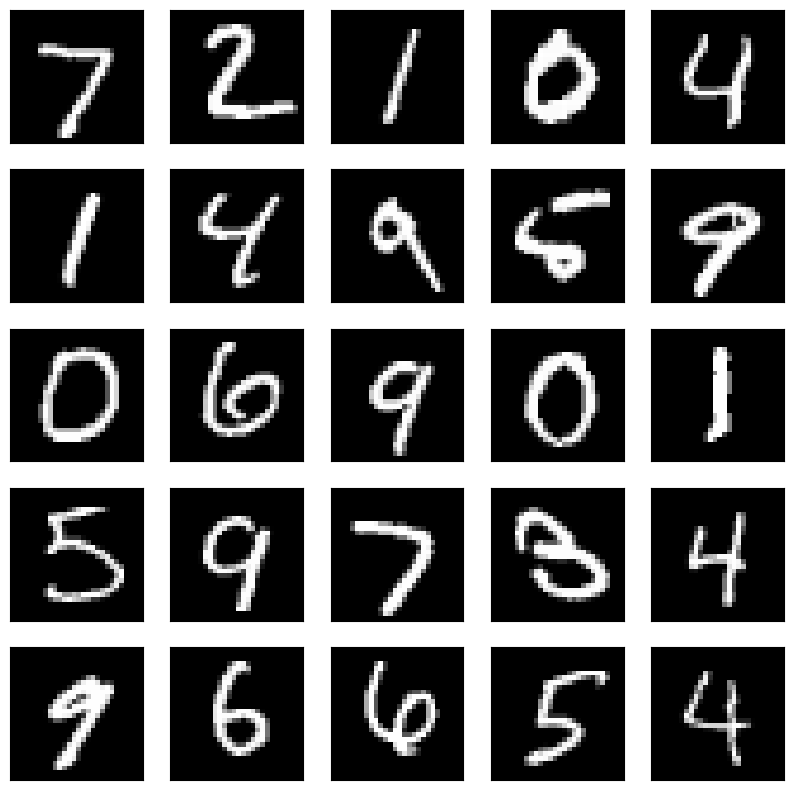

In [24]:
_, ax = plt.subplots(5, 5, figsize=(10, 10))
index = 0

for i in range(5):
    for j in range(5):
        cell = ax[i][j]
        cell.set_xticks([])
        cell.set_yticks([])
        cell.grid(False)
        cell.imshow(X_test[index], cmap='gray')
        index += 1

plt.show()

Es importante que podamos asegurarnos que nuestras imágenes están normalizadas, por lo cual debemos llevarlas al rango 0...1. Esto lo conseguimos de manera muy sencilla simplemente diviviendo X_train y X_test por 255

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train[0:1, 10:15, 10: 15])

[[[0.00392157 0.60392157 0.99215686 0.35294118 0.        ]
  [0.         0.54509804 0.99215686 0.74509804 0.00784314]
  [0.         0.04313725 0.74509804 0.99215686 0.2745098 ]
  [0.         0.         0.1372549  0.94509804 0.88235294]
  [0.         0.         0.         0.31764706 0.94117647]]]


In [26]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

X_train.shape

(60000, 28, 28, 1)

EJERCICIO:

Crear una red convolucional de las siguientes características:

*   Capa convolucional de 32 filtros 3x3, padding same
*   Capa convolucional de 64 filtros 3x3, padding valid
*   Capa convolucional de 128 filtros 3x3, padding valid

Clasificador:

* 64 unidades, activación relu
* 64 unidades, activación relu
* Capa de salida: 10 unidades, activación softmax



In [27]:
model = keras.Sequential([
    # Capas convucionales
    Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), padding='valid', activation='relu'),
    Conv2D(128, (3, 3), padding='valid', activation='relu'),
    # Capas clasificadores
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


Ahora procedemos a definir nuestra función de costo y el optimizador. En este caso Adam

In [28]:
# Completar esta parte
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical:crossentropy', metrics=['accuracy'])


¡Ahora a entrenar nuestra red neuronal! En Keras es tan simple como llamar a __fit__

In [33]:
n_epochs = 10

# Completar esta parte
hist = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=n_epochs, batch_size=32)


Epoch 1/10


ValueError: ignored

También podemos visualizar el historial de error de nuestra red neuronal. Esto es muy sencillo por medio de __hist__

In [ ]:
history = hist.history
loss = history['loss']
val_loss = history['val_loss']
x = np.arange(n_epochs) + 1

plt.title("Loss function")
plt.plot(x, loss, label="Train loss")
plt.plot(x, val_loss, label="Validation loss")
plt.legend()
plt.show()

No estaría demás probar con algunas imágenes para ver cómo vamos

# PARTE 2. Fashion MNIST

El dataset anterior era muy sencillo y cualquier modelo sencillo es capaz de obtener muy buenos resultados. Sin embargo ahora nos moveremos a un dataset de imágenes un poco más complejo

La distribución de Keras ya trae consigo el dataset que utilizaremos para este ejercicio, por lo cual lo único que debemos hacer es cargar el mismo.

In [ ]:
dataset = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = dataset.load_data()

EJERCICIO: Visualizar las dimensiones de los sets de entrenamiento y prueba. Cuántos ejemplos tiene cada dataset y cuáles son sus dimensiones?

In [ ]:
print("Dimensiones de X_train: ", X_train.shape)
print("Dimensiones de X_test: ", X_test.shape)

Ahora procederemos a codificar nuestras clases según el índice entre 0 y 9 que le corresponde a su respectiva categoría:

In [ ]:
print("Primeros 10 elementos de y_test: ", y_test[0:10])

clases = ['Polera', 'Pantalón', 'Chompa', 'Vestido', 'Chaqueta', 'Sandalias', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

A continuación vemos algunas imágenes del dataset con sus respectivos rótulos

In [ ]:
_, ax = plt.subplots(5, 5, figsize=(10, 10))
index = 0

for i in range(5):
    for j in range(5):
        cell = ax[i][j]
        cell.set_xticks([])
        cell.set_yticks([])
        cell.grid(False)
        cell.set_xlabel(clases[y_test[index]])
        cell.imshow(X_test[index], cmap='gray')
        index += 1

plt.show()

EJERCICIO: Normalizar los sets de entrenamiento y prueba para que estén en el rango 0 - 1

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train[0, 5:10, 5:10])

Ahora tenemos todo lo que necesitamos para entrenar nuestro modelo. En este sentido, lo primero que haremos será definir el mismo:

EJERCICIO:

Definir una red convolucional de las siguientes características:

* Capa convolucional de 64 filtros 3x3, padding same
* Capa convolucional de 64 filtros 3x3, padding same
* Capa convolucional de 128 filtros 3x3, padding same

Clasificador:

* 64 unidades, activación relu
* 64 unidades, activación relu
* Capa de salida: 10 unidades, activación softmax

In [ ]:
# Completar

model = keras.Sequential([

])

EJERCICIO: Compilar el modelo con los siguiente parmámetros:

- Optimizador Rmsprop
- Loss: sparse_categorical_crossentropy
- Métricas: Accuracy

In [ ]:
# Completar el código


EJERCICIO: Entrenar el modelo. 10 epochs. Visualizar los datos de validación en cada iteración.

In [ ]:
# Entrenar el modelo
n_iter = 10

hist =

Podemos ver que nuestra exactitud en validación es 90% en el mejor de los casos, lo cual no está mal. Sin embargo, las redes convolucionales nos permiten mejorar sustancialmente estos resultados. A continuación veremos cómo podemos mejorar esto con una red convolucional.